<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Predicting_next(X)days_Stock_Price_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [97]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data (1).csv


In [98]:
df = pd.read_csv('updated-sbl-data.csv')
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [99]:
df.tail()

,Date,Open,High,Low,Ltp,Turnover
1995,2013-03-21,306.00,311.00,303.00,308.00,"821,123.00"
1996,2013-03-20,312.00,312.00,306.00,306.00,"261,298.00"
1997,2013-03-19,311.00,312.00,309.00,312.00,"663,393.00"
1998,2013-03-18,315.00,317.00,305.00,311.00,"897,326.00"
1999,2013-03-17,321.00,320.00,310.00,315.00,"796,657.00"


In [100]:
df = df.set_index("Date")[['Ltp']].head(1000)

# print('done')

# df.index

In [101]:
df = df.set_index(pd.to_datetime(df.index))

df.head()

,Ltp
Date,
2022-06-29,315.00
2022-06-28,313.00
2022-06-27,312.00
2022-06-26,320.00
2022-06-24,307.00


In [102]:
df.index

DatetimeIndex(['2022-06-29', '2022-06-28', '2022-06-27', '2022-06-26',
               '2022-06-24', '2022-06-23', '2022-06-22', '2022-06-21',
               '2022-06-20', '2022-06-19',
               ...
               '2018-03-04', '2018-02-28', '2018-02-27', '2018-02-26',
               '2018-02-25', '2018-02-22', '2018-02-21', '2018-02-20',
               '2018-02-18', '2018-02-15'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)

In [103]:
df.columns

Index(['Ltp'], dtype='object')

In [104]:
df["Ltp"] = df["Ltp"].str.replace(",","")
ltp = df["Ltp"].apply(lambda x: float(x))

In [105]:
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index)
df.head()

,Ltp
Date,
2022-06-29,0.154172
2022-06-28,0.148126
2022-06-27,0.145103
2022-06-26,0.169287
2022-06-24,0.129988


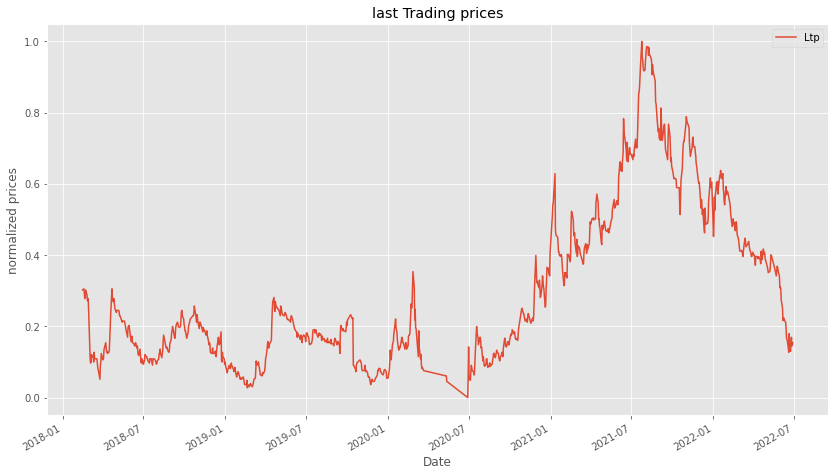

In [106]:
df.plot(figsize=(14,8))
plt.title('last Trading prices')
plt.ylabel('normalized prices')
plt.show()

In [107]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [108]:
n_per_in = 50
n_per_out = 2

n_features = 1

X,y = split_sequences(list(df.Ltp), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(949, 50)
(949, 50, 1)
(949, 2)


In [109]:
model = Sequential()
model.add(LSTM(200, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(100, activation='softsign', return_sequences=True))
model.add(LSTM(50, activation='softsign', return_sequences=True))
model.add(LSTM(34, activation='softsign', return_sequences=True))
model.add(LSTM(20, activation='softsign', return_sequences=True))
model.add(LSTM(4, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 50, 200)           161600    
                                                                 
 lstm_19 (LSTM)              (None, 50, 100)           120400    
                                                                 
 lstm_20 (LSTM)              (None, 50, 50)            30200     
                                                                 
 lstm_21 (LSTM)              (None, 50, 34)            11560     
                                                                 
 lstm_22 (LSTM)              (None, 50, 20)            4400      
                                                                 
 lstm_23 (LSTM)              (None, 4)                 400       
                                                                 
 dense_3 (Dense)             (None, 2)                

In [110]:
model.compile(optimizer='adam',loss='mse', metrics=['mse'])

In [111]:
res = model.fit(X,y, epochs=1000, batch_size=128, validation_split=0.1)

Epoch 1/1000
7/7 [==============================] - 14s 735ms/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2/1000
7/7 [==============================] - 4s 557ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/1000
7/7 [==============================] - 4s 604ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 4/1000
7/7 [==============================] - 4s 588ms/step - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 5/1000
7/7 [==============================] - 4s 582ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 6/1000
7/7 [==============================] - 4s 578ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 7/1000
7/7 [==============================] - 4s 578ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 8/1000
7/7 [==============================] - 4s 573ms/step - loss: 0

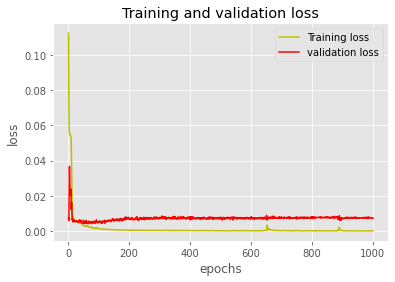

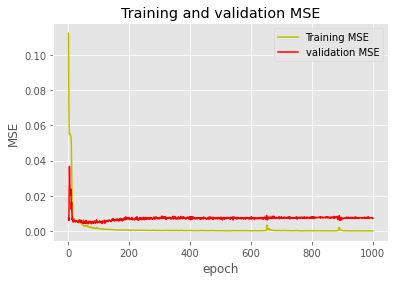

In [112]:
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss,'y', label="Training loss")
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title("Training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


mse = res.history['mse']
val_mse = res.history['val_mse']
epoch=range(1,len(mse)+1)
plt.plot(epoch, mse,'y', label="Training MSE")
plt.plot(epochs, val_mse, 'r', label='validation MSE')
plt.title("Training and validation MSE")
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [113]:
# m= scaler.inverse_transform(np.array(X).reshape(-1,1)).tolist()
# print(m)


# n= scaler.inverse_transform(np.array(X[-1]).reshape(-1,1)).tolist()
# print(n)

In [114]:
# p= scaler.inverse_transform(np.array(y).reshape(-1,1)).tolist()
# print(p)


# q= scaler.inverse_transform(np.array(y[-1]).reshape(-1,1)).tolist()
# print(q)

Predicted:  [[286.26535864174366], [292.5660370707512]]
Actual Value:  [[365.0], [364.0]]


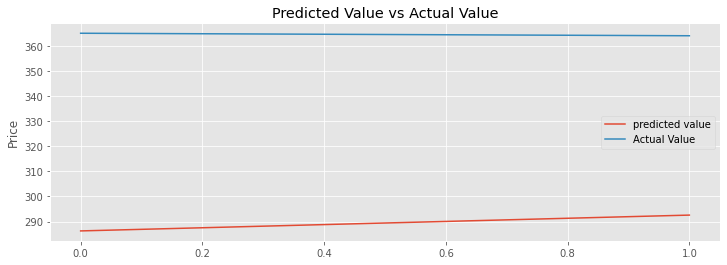

In [123]:
plt.figure(figsize=(12,4))

y_predicts = model.predict(X[-1].reshape(-1,1)).tolist()[0]

# y_predicts
y_predicts = scaler.inverse_transform(np.array(y_predicts).reshape(-1,1)).tolist()
# y_predicts

actual_value = scaler.inverse_transform(y[-1].reshape(-1,1)).tolist()
# actual_value

print("Predicted: ", y_predicts)
plt.plot(y_predicts, label="predicted value")

print("Actual Value: ",actual_value)
plt.plot(actual_value, label="Actual Value")

plt.title("Predicted Value vs Actual Value")
plt.ylabel("Price")
plt.legend()
plt.show()

In [124]:
actual_value

[[365.0], [364.0]]

In [125]:
y_predicts

[[286.26535864174366], [292.5660370707512]]

                   Ltp
2022-06-29  388.401233
2022-06-30  390.326008


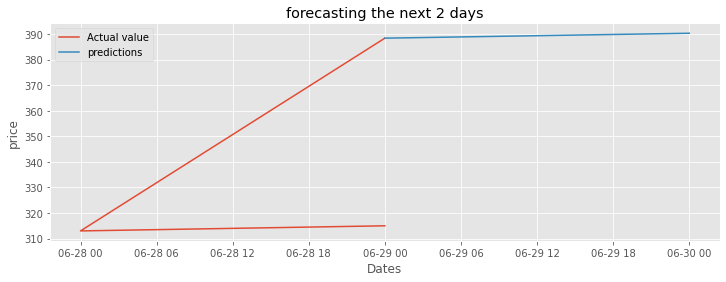

In [127]:
y_predicts = model.predict(np.array(df.head(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]

# y_predicts
y_predicts = scaler.inverse_transform(np.array(y_predicts).reshape(-1,1)).tolist()
# y_predicts

preds = pd.DataFrame(y_predicts, index=pd.date_range(start=df.index[0], periods=len(y_predicts), freq='D'), columns=df.columns)
print(preds)

periods=2

actual_value=pd.DataFrame(scaler.inverse_transform(df[['Ltp']].head(periods)), index=df.Ltp.head(periods).index, columns=df.columns).append(preds.head(1))
# print(actual_value)

plt.figure(figsize=(12,4))
plt.plot(actual_value, label="Actual value")
plt.plot(preds, label="predictions")
plt.ylabel("price")
plt.xlabel("Dates")
plt.title(f"forecasting the next {len(y_predicts)} days")
plt.legend()
plt.show();